In [27]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
inputs = keras.Input(shape=(28,28,1))
x= layers.Conv2D(filters=32,kernel_size=3,activation="relu")(inputs)
x=layers.MaxPool2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation="relu")(x)
x=layers.MaxPool2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation="relu")(x)
x=layers.Flatten()(x)
outputs= layers.Dense(10,activation="softmax")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Load and preprocess the data
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# Reshape the images to add the channel dimension (for grayscale: 1 channel)
train_images.reshape(60000,28,28,1)
test_images.reshape(10000,28,28,1)

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
# Compile the model
model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss,test_acc= model.evaluate(test_images,test_labels)
print(f"test accuracy {test_acc:.3f}")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8805 - loss: 0.3879
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9856 - loss: 0.0473
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9886 - loss: 0.0339
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9929 - loss: 0.0236
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9947 - loss: 0.0179
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9891 - loss: 0.0329
test accuracy 0.992


In [59]:

import os, shutil, pathlib
#os: A module that provides a way to interact with the file system (like creating directories, checking if files exist, etc.).
#shutil: A module that offers functions to perform high-level file operations, like copying files and directories.
#pathlib: A module that provides an object-oriented interface for working with file system paths. It is more modern and flexible compared to using strings for file paths.
original_dir = pathlib.Path("/Users/divyaravi/Desktop/dogs-vs-cats/train")
new_base_dir = pathlib.Path("/Users/divyaravi/Desktop/dogs-vs-cats")

def make_subset(subset_name, start_index, end_index):
    #This for loop iterates over the two categories of images: cat and dog. 
    #It ensures that the function handles both classes in the dataset.
    #Each iteration will process all files related to cat images first, and then dog images.
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)  # Use exist_ok=True to avoid error if directory already exists
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

#functional call 
make_subset("train", start_index=0, end_index=1000) # 0 - 1000 training model.
make_subset("validation", start_index=1000, end_index=1500) #1000- 1500 validation model.
make_subset("test", start_index=1500, end_index=2500) #1500 to 2500 testing model.



In [67]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = layers.Input(shape=(180,180,3))
x= layers.Rescaling(1./255)(inputs)
x=layers.Conv2D(filters=32,kernel_size=3,activation="relu")(x)
x=layers.MaxPool2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation="relu")(x)
x=layers.MaxPool2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation="relu")(x)
x=layers.MaxPool2D(pool_size=2)(x)
x=layers.Conv2D(filters=246,kernel_size=3,activation="relu")(x)
x=layers.MaxPool2D(pool_size=2)(x)
x=layers.Conv2D(filters=246,kernel_size=3,activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentrophy",
              optimizer="rmsprop",
              metrics=['accuracy'])


In [69]:
model.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 18, 18, 246)    │       283,638 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 9, 9, 246)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 7, 7, 246)      │       544,890 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 12054)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │        12,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 933,831 (3.56 MB)

 Trainable params: 933,831 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [1]:
import numpy as np
import tensorflow as tf
#A matrix of 1000 samples with 16 features each, drawn from a normal distribution.
random_numbers = np.random.normal(size=(1000, 16))
#A tf.data.Dataset that contains each row of the random_numbers matrix as an individual element in the dataset.
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
for i,element in enumerate(dataset):
    print(element.shape)
    if i >= 2 :
        break


(16,)
(16,)
(16,)


2024-09-25 09:11:59.787613: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-09-25 09:11:59.787632: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-25 09:11:59.787637: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-25 09:11:59.787650: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-25 09:11:59.787660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


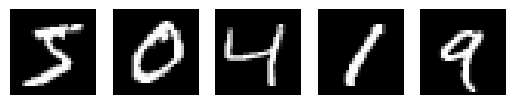

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8651 - loss: 0.4803 - val_accuracy: 0.9858 - val_loss: 0.0489
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9811 - loss: 0.0551 - val_accuracy: 0.9882 - val_loss: 0.0409
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9881 - loss: 0.0376 - val_accuracy: 0.9778 - val_loss: 0.0770
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9903 - loss: 0.0279 - val_accuracy: 0.9913 - val_loss: 0.0308
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9931 - loss: 0.0200 - val_accuracy: 0.9905 - val_loss: 0.0375
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9947 - loss: 0.0145 - val_accuracy: 0.9892 - val_loss: 0.0404
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9958 - loss: 0.0121 - val_accuracy: 0.9903 - val_loss: 0.0408
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9972 - loss: 0

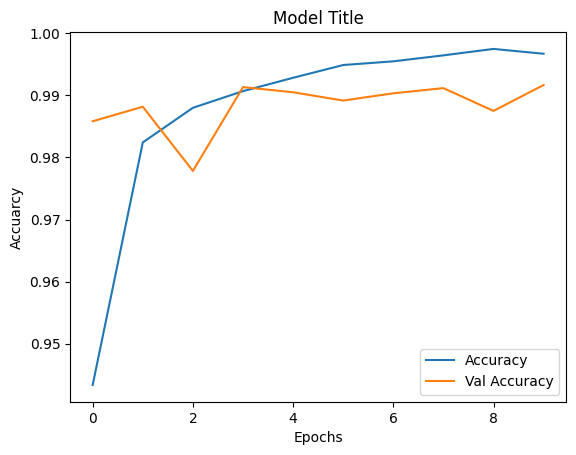

In [20]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()

# Reshape to fit the model 
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

#Normalize pixel values between 0 and 1 
train_images = train_images/255.0
test_images = test_images/255.0

#Display first 5 images from the following set
for i in range(5):
    plt.subplot(1,5,i+1)
    #Subplots allow you to plot multiple images or graphs within the same figure, arranged in rows and columns.
    #(1(no of rows),5(num of columns),i+1)
    plt.imshow(train_images[i].reshape(28,28),cmap="gray")
    #imshow function helps to display the function
    #this reshapes image has to be (28*28) in conv model we did rehape as (28,28,1). we are removing the third dimension
    plt.axis("off") #turns off the labels
plt.show()

model = models.Sequential()

# First convolutional layer: 32 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
# Max pooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2,2)))
#Second convoluional layer
model.add(layers.Conv2D(64,(3,3),activation="relu"))
#Second max pooling layer with 2*2 pool size
model.add(layers.MaxPooling2D((2,2)))
#Flatten the output to feed into fully connected layer 
model.add(layers.Flatten())
#Add a fully connnected dense model
model.add(layers.Dense(64,activation="relu"))
#Add the output layer with 10 units and softmax classification
model.add(layers.Dense(64,activation="softmax"))

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history= model.fit(train_images,train_labels,epochs=10,validation_split=0.1)
#0.1 denotes 10 % of the traning data are kept for validation
test_loss,test_accuracy = model.evaluate(test_images,test_labels)
print(f"test accuarcy {test_accuracy:.3f}")
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history.history['val_accuracy'],label="Val Accuracy")
plt.title("Model Title")
plt.xlabel("Epochs")
plt.ylabel("Accuarcy")
plt.legend(loc="lower right")
plt.show()

predictions=model.predict(test_images)


